In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import math

from scipy import stats

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

%matplotlib inline

df = pd.read_csv('naplex_corr.csv')

In [33]:
df.head()

,NAPLEX Total Score,Days to Take,Age,CGPA,Math/Sci GPA,PCAT-compos,MMI,Class
0,99,12.0,22.0,2.98,2.98,87.0,230.0,2017
1,43,122.0,22.0,3.16,3.26,76.0,206.0,2017
2,104,39.0,31.0,3.10,3.77,87.0,227.0,2017
3,75,37.0,25.0,3.07,3.13,47.0,197.5,2017
4,96,30.0,24.0,3.10,3.28,74.0,175.0,2017


In [34]:
display(df.isnull().any())
display(df.shape)

NAPLEX Total Score    False
Days to Take          False
Age                   False
CGPA                  False
Math/Sci GPA          False
PCAT-compos            True
MMI                    True
Class                 False
dtype: bool

(153, 8)

In [35]:
df = df.dropna(how='any')
display(df.isnull().any())
display(df.shape)

NAPLEX Total Score    False
Days to Take          False
Age                   False
CGPA                  False
Math/Sci GPA          False
PCAT-compos           False
MMI                   False
Class                 False
dtype: bool

(136, 8)

In [36]:
corr = df.corr()
display(corr)

,NAPLEX Total Score,Days to Take,Age,CGPA,Math/Sci GPA,PCAT-compos,MMI,Class
NAPLEX Total Score,1.000000,-0.333803,-0.040797,0.219199,0.297111,0.239245,0.086912,-0.092985
Days to Take,-0.333803,1.000000,0.368463,-0.057033,-0.023919,-0.132088,-0.203337,-0.087577
Age,-0.040797,0.368463,1.000000,0.041672,0.113056,0.094891,0.070029,-0.249686
CGPA,0.219199,-0.057033,0.041672,1.000000,0.588422,0.200644,0.015733,0.127689
Math/Sci GPA,0.297111,-0.023919,0.113056,0.588422,1.000000,0.149196,-0.117381,-0.379307
PCAT-compos,0.239245,-0.132088,0.094891,0.200644,0.149196,1.000000,0.139561,-0.094166
MMI,0.086912,-0.203337,0.070029,0.015733,-0.117381,0.139561,1.000000,0.207367
Class,-0.092985,-0.087577,-0.249686,0.127689,-0.379307,-0.094166,0.207367,1.000000


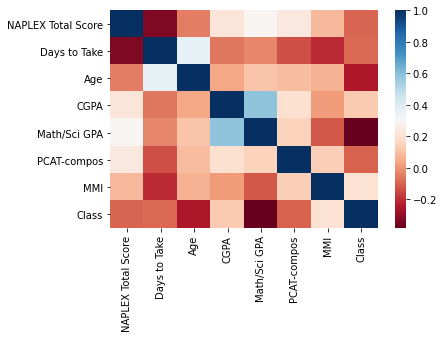

In [39]:
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, cmap = "RdBu")

In [41]:
df_before = df

x1 = sm.tools.add_constant(df_before)

series_before = pd.Series([variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])], index = x1.columns)
print('DATA BEFORE')
print('-'*100)
display(series_before)

DATA BEFORE
----------------------------------------------------------------------------------------------------


const                 2.751111e+07
NAPLEX Total Score    1.284696e+00
Days to Take          1.395682e+00
Age                   1.309997e+00
CGPA                  2.041186e+00
Math/Sci GPA          2.345686e+00
PCAT-compos           1.139517e+00
MMI                   1.161181e+00
Class                 1.667350e+00
dtype: float64

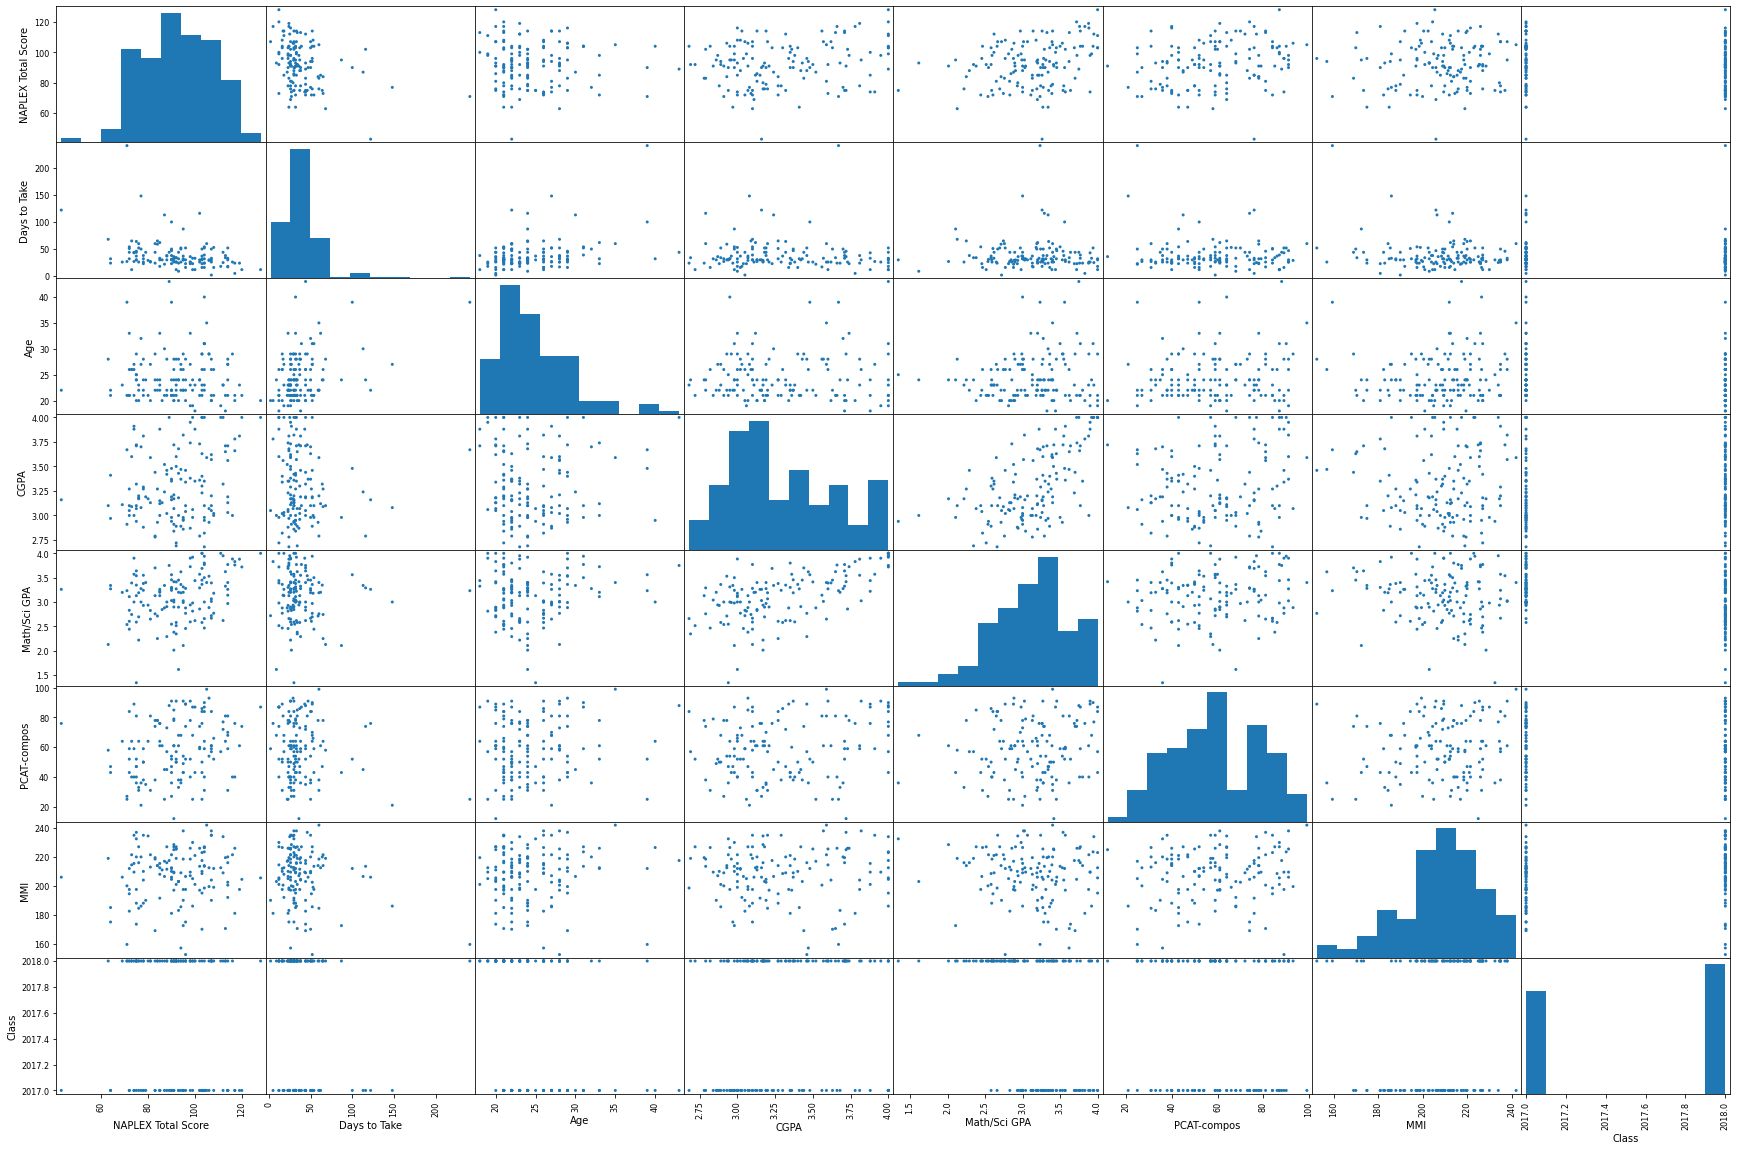

In [44]:
pd.plotting.scatter_matrix(df, alpha = 1, figsize = (30,20))
plt.show()